## Naive Bayes
- 数据集
$$sklearn.datasets.load\_digits$$
- 输出
$$y=\mathop{\arg\min}_{c_k}P(Y=c_k)\prod_jP(X^{(j)}=x^{(j)}|Y=c_k)$$

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
X,Y=load_digits(return_X_y=True)
Train_x,Val_x,Train_y,Val_y=train_test_split(X,Y,test_size=0.2)

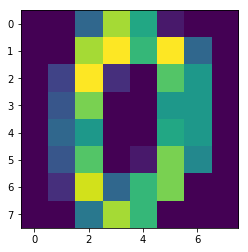

In [3]:
plt.imshow(X[0].reshape(8,8))

In [4]:
class Naive_Bayes():
    def __init__(self,features,labels):
        self.labels=labels
        self.features=features
        self.P_y=np.zeros(labels)
        dic=dict(list(zip([i for i in range(16+1)],[0 for i in range(16+1)])))     ##feature range=0~16
        self.P_x_y=[[dic.copy() for i in range(features)] for i in range(labels)]
        
    def fit(self,X,Y):
        for x,y in zip(X,Y):
            self.P_y[y]+=1
            for i,j in enumerate(x):
                self.P_x_y[y][i][j]=self.P_x_y[y][i].get(j,0)+1  ##P_x_y[y][i][j]: P(dim=i,feature=j|label=y),lamda=1
        
        for i in range(self.labels):
            for j in range(self.features):
                for u,v in self.P_x_y[i][j].items():
                    self.P_x_y[i][j][u]=(self.P_x_y[i][j][u]+1)/(self.P_y[i]+len(self.P_x_y[i][j].keys()));
                    
        for i in range(labels):
            self.P_y[i]=(self.P_y[i]+1)/(X.shape[0]+labels)
                
    def predict(self,X):
        res=[]
        for x in X:
            ans=[]
            for i in range(self.labels):
                p=math.log(self.P_y[i])
                for u,v in enumerate(x):
                    p+=math.log(self.P_x_y[i][u][v])
                ans.append(p)
            res.append(np.argmax(ans))
        return np.array(res)

In [5]:
features,labels=len(X[0]),len(set(Y))
clf=Naive_Bayes(features,labels)
clf.fit(Train_x,Train_y)

Y=clf.predict(Train_x)
print("Befor Train,Acc: %lf%%"%(sum(Y==Train_y)/len(Train_x)*100))

Y=clf.predict(Val_x)
print("After Train,Acc: %lf%%"%(sum(Y==Val_y)/len(Val_x)*100))

Befor Train,Acc: 96.450939%
After Train,Acc: 91.666667%
